In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt 
import scipy.stats as stats

`Question: 1` A company wants to estimate the average time spent by customers on their website per session. They collect a random sample of 100 customers and find that the sample mean time spent is 4.5 minutes with a sample standard deviation of 1.2 minutes. Calculate a 99% confidence interval for the true population mean time spent on the website per session.

In [4]:
# problem 1

mu=4.5
s=1.2
n=100
confiedence_level=99
t_value=2.626
# we have to calculate the 99% confidence intereval
lower_limit=mu-t_value * s/np.sqrt(n)
upper_limit=mu + t_value * s/np.sqrt(n)
print('confidence interval','-',(lower_limit,upper_limit))

confidence interval - (4.18488, 4.81512)



`Question 2:` A car manufacturer is interested in estimating the mean gas mileage of their new SUV. A sample of 25 SUVs is taken, and their mean gas mileage is found to be 28.6 miles per gallon with a standard deviation of 2.8 miles per gallon. Calculate a 95% confidence interval for the true mean gas mileage of the SUV.

In [5]:
mu=28.6
s=2.8
n=25
confiedence_level=95
t_value=2.086
# we have to calculate the 99% confidence intereval
lower_limit=mu-t_value * s/np.sqrt(n)
upper_limit=mu + t_value * s/np.sqrt(n)
print('confidence interval','-',(lower_limit,upper_limit))

confidence interval - (27.43184, 29.76816)


`Question -3:` Dataset - India temperature dataset.

Data link: https://drive.google.com/file/d/1whb8Rjdk9TBKOwVi8NwZD1Tc8Tdv7iEc/view?usp=share_link

Kaggle Link : (Just take IND data for this question, have to apply filtering). https://www.kaggle.com/datasets/berkeleyearth/climate-change-earth-surface-temperature-data

A climate research organization wants to estimate the average temperature of a certain country. They collect temperature data for 2613 days but due to certain limitations, they only have information about the average temperature for 2508 days. The organization assumes that the population follows a normal distribution and wants to estimate the population mean temperature with a 95% confidence interval.

* Standard deviation is assumed as given data standard deviation. z Procedure
* Standard deviation is not given. Apply t Procedure

In [6]:
df=pd.read_csv('ind_temp.csv')

In [9]:
df.size

10452

In [14]:
india=df[df.Country=='India']

In [32]:
sample=np.array([india['AverageTemperature'].dropna().sample(100) for _ in range (0,30)])

In [34]:
sample_mean=sample.mean(axis=1)

In [36]:
sample_std=sample.std(axis=1)

In [37]:
std=india.AverageTemperature.std()


In [49]:
# when the std of population is known and the confidence level is 95%
lower_limit=sample_mean.mean()-1.97*std/np.sqrt(30)
upper_limit=sample_mean.mean()+1.97*std/np.sqrt(30)

print('confidence interval','-',(lower_limit,upper_limit))
print('population mean','-',india.AverageTemperature.mean())

confidence interval - (22.270349857491443, 25.382088809175226)
population mean - 23.873789473684212


In [48]:
# when population std() is unknown then we use t procedure 
t_value=2.02
lower_limit=sample_mean.mean()-t_value*sample_std.mean()/np.sqrt(30)
upper_limit=sample_mean.mean()+t_value*sample_std.mean()/np.sqrt(30)

print('confidence interval','-',(lower_limit,upper_limit))
print('population mean','-',india.AverageTemperature.mean())

confidence interval - (22.240748740643966, 25.411689926022703)
population mean - 23.873789473684212


In [20]:
mean=india.AverageTemperature.mean()
std=india.AverageTemperature.std()


<AxesSubplot: ylabel='Density'>

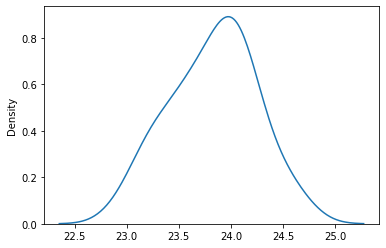

In [50]:
sns.kdeplot(sample_mean)


`Question 5:` BMW Dataset : https://drive.google.com/file/d/18amVv1WKKHEmwyvVy0RuXp4A6xrGOelc/view?usp=share_link



* Task 1:
The sales manager of a used car company wants to know what is the average selling price of all the used bmw cars.
The analyst can collect only a sample of sales of 500 cars in the area. Since this estimate is going to be used by the company to strategize sales of his company, the sample mean should be a good approximation of all the account.
What level of confidence is the sales manager going to be satisfied with? What +/- interval number is going to be acceptable?

* Task 2:
In addition to the price of the car, the manager also wants to now know the average mileage that the car has been driven. But the manager does not have the population standard deviation for the mileage. But the mileage data is available only from the 25 cars that they have sold so far.
How do the analyst approach this problem to calculate 95% confidence interval, with only 25 samples?

* Task 3:
The manager is not happy with both the intervals (intervals from task 1 and 2) as the interval for the confidence is very high. The manager now asks the analyst to estimate the average price of the car (similar to task 1) but within a bound of 750 from the mean with 95% condidence level. How many sample does the analyst have to collect to arrive at this confidence interval level?

* Task 4:
Conversely, after the analyst started collecting the data, after a week he was only able to collect for 420 samples, though he needs 540 samples for Bound of 1,000, if he has to do the analysis now, what is the best interval he can acheive for 95% confidence levels?

In [51]:
bmw=pd.read_csv('bmw.csv')

In [53]:
bmw.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,5 Series,2014,11200,Automatic,67068,Diesel,125,57.6,2.0
1,6 Series,2018,27000,Automatic,14827,Petrol,145,42.8,2.0
2,5 Series,2016,16000,Automatic,62794,Diesel,160,51.4,3.0
3,1 Series,2017,12750,Automatic,26676,Diesel,145,72.4,1.5
4,7 Series,2014,14500,Automatic,39554,Diesel,160,50.4,3.0


In [65]:
sample=bmw.price.sample(500)

<AxesSubplot: ylabel='Density'>

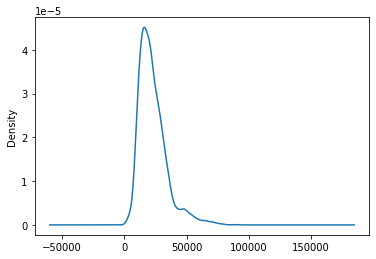

In [67]:
bmw.price.plot(kind='kde')

In [63]:
confidence_level = 0.99
z = stats.norm.ppf(1 - (1 - confidence_level) / 2)  

In [71]:
lower_limit=sample.mean()-z*bmw.price.std()/np.sqrt(500)
upper_limit=sample.mean()+z*bmw.price.std()/np.sqrt(500)

print('confidence interval','-',(lower_limit,upper_limit))
print('population mean','-',bmw.price.mean())

confidence interval - (22420.08692862803, 25050.101071371973)
population mean - 22733.408867452


In [75]:
bmw

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,5 Series,2014,11200,Automatic,67068,Diesel,125,57.6,2.0
1,6 Series,2018,27000,Automatic,14827,Petrol,145,42.8,2.0
2,5 Series,2016,16000,Automatic,62794,Diesel,160,51.4,3.0
3,1 Series,2017,12750,Automatic,26676,Diesel,145,72.4,1.5
4,7 Series,2014,14500,Automatic,39554,Diesel,160,50.4,3.0
...,...,...,...,...,...,...,...,...,...
10776,X3,2016,19000,Automatic,40818,Diesel,150,54.3,2.0
10777,5 Series,2016,14600,Automatic,42947,Diesel,125,60.1,2.0
10778,3 Series,2017,13100,Manual,25468,Petrol,200,42.8,2.0
10779,1 Series,2014,9930,Automatic,45000,Diesel,30,64.2,2.0


In [130]:
s=np.array([bmw.mileage.sample(25) for i in (0,25)])

In [131]:
s.mean(axis=1).mean()

24228.22

In [135]:
lower_limit=s.mean(axis=1).mean()-2.060*s.std(axis=1).mean()/np.sqrt(25)
upper_limit=s.mean(axis=1).mean()+2.060*s.std(axis=1).mean()/np.sqrt(25)
print('confidence interval','-',(lower_limit,upper_limit))
print('population mean','-',bmw.mileage.mean())

confidence interval - (13932.042493114921, 34524.397506885085)
population mean - 25496.986550412763


In [84]:
bmw.mileage.mean()

25496.986550412763

# 3

In [149]:
bound=750
confidence_level=95

n=(1.9*(bmw.price.std()/750))**2
print(n)

836.328114921153


In [152]:
# 

s=420
bmw.price

0        11200
1        27000
2        16000
3        12750
4        14500
         ...  
10776    19000
10777    14600
10778    13100
10779     9930
10780    15981
Name: price, Length: 10781, dtype: int64